In [2]:
import pandas as pd

In [3]:
from statsmodels.tsa.stattools import adfuller

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
import statsmodels.api as sm

In [6]:
import statsmodels.api as sm

In [7]:
import pmdarima

In [8]:
from pmdarima.arima import auto_arima

In [9]:
from matplotlib import pyplot as plt

In [10]:
df=pd.read_excel(r'C:\Users\ZarasAndreas\Documents\Documents\Courses Taught by Me\Forecasting Course_FINAL\FINAL\Course Presentations\Python\housing - Python.xlsx')

<AxesSubplot:xlabel='Date'>

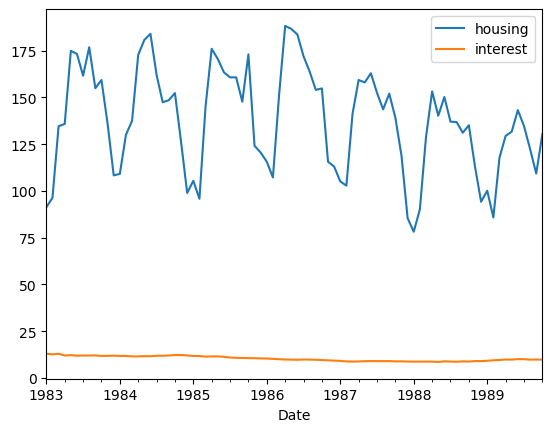

In [11]:
df=df.set_index("Date")
df.plot()

In [12]:
split=round(len(df)*0.75)
train=df.iloc[:split,:]
validation=df.iloc[split:,:]
validation

,housing,interest
Date,,
1988-03-01,128.8,8.77
1988-04-01,153.2,8.76
1988-05-01,140.2,8.59
1988-06-01,150.2,8.90
1988-07-01,137.0,8.80
1988-08-01,136.8,8.68
1988-09-01,131.1,8.90
1988-10-01,135.1,8.77
1988-11-01,113.0,9.05


<AxesSubplot:xlabel='Date'>

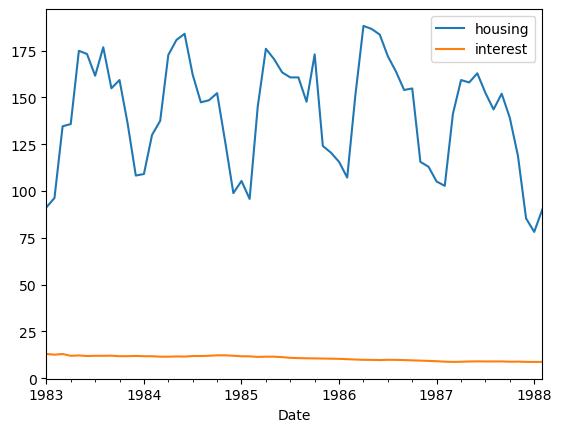

In [13]:
train.plot()

In [14]:
pmdarima.arima.nsdiffs(train['housing'],m=4)

0

In [15]:
pmdarima.arima.nsdiffs(train['housing'],m=12)

1

In [16]:
adfuller(train["housing"])

(-0.13226148201903756,
 0.9461288415607777,
 10,
 51,
 {'1%': -3.5656240522121956,
  '5%': -2.920142229157715,
  '10%': -2.598014675124952},
 411.73958523263417)

In [17]:
train_seasonal_diff = train["housing"].diff(12)
train_seasonal_diff=train_seasonal_diff.dropna()
pmdarima.arima.nsdiffs(train_seasonal_diff,m=12)
adfuller(train_seasonal_diff)

(-2.7147934993303764,
 0.0715131449606451,
 1,
 48,
 {'1%': -3.5745892596209488,
  '5%': -2.9239543084490744,
  '10%': -2.6000391840277777},
 305.9007820724692)

In [18]:
train_seasonal_first_diff = train_seasonal_diff.diff(1)
train_seasonal_first_diff=train_seasonal_first_diff.dropna()
adfuller(train_seasonal_first_diff)

(-7.23713874540196,
 1.926363754094476e-10,
 1,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 300.7408447968513)

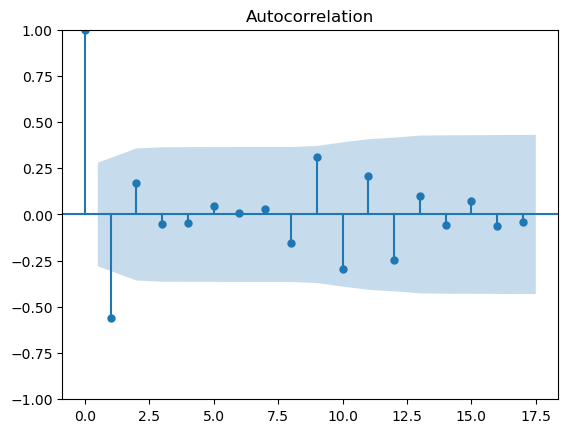

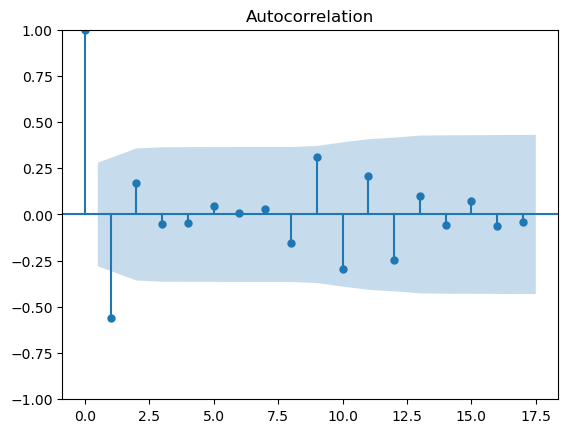

In [19]:
plot_acf(train_seasonal_first_diff)

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


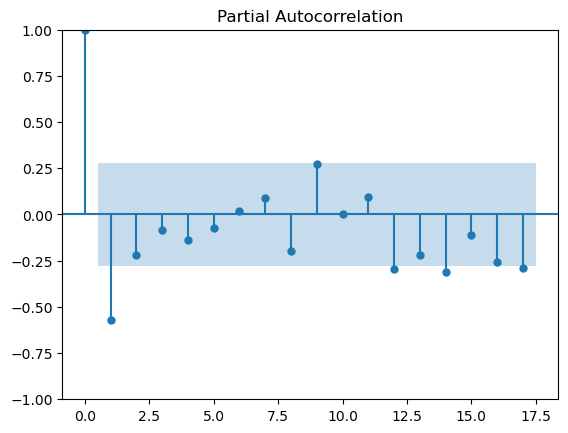

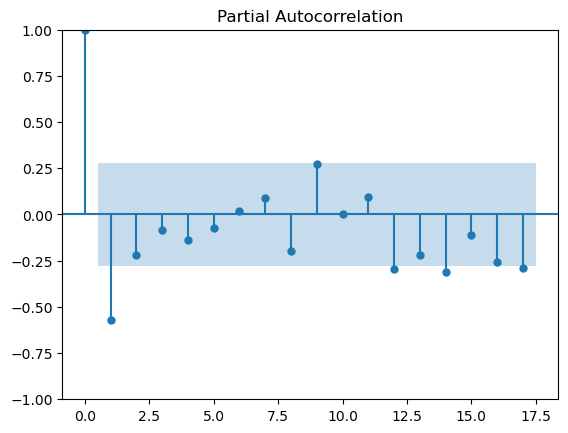

In [20]:
plot_pacf(train_seasonal_first_diff)

In [21]:
sarima = sm.tsa.statespace.SARIMAX(train[["housing"]],exog=train[["interest"]],order=(0,1,1),seasonal_order=(1,1,0,12),trend='c').fit()
sarima.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                             housing   No. Observations:                   62
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -192.181
Date:                             Mon, 10 Jul 2023   AIC                            394.362
Time:                                     19:42:06   BIC                            403.821
Sample:                                 01-01-1983   HQIC                           397.951
                                      - 02-01-1988                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.8388      0.165     -5.069      0.000      -1.163      -0.514
interest     -11.9827      3.819     -3.138      0.002     -19.468      -4.498
ma.L1         -0.9999     50.651     -0.020      0.984    -100.274      98.275
ar.S.L12      -0.3937      0.148     -2.669      0.008      -0.683      -0.105
sigma2       130.9609   6634.400      0.020      0.984   -1.29e+04    1.31e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.54   Prob(JB):                         0.96
Heteroskedasticity (H):               0.56   Skew:                            -0.04
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

pred_res = sarima.get_prediction()
pred_res.predicted_mean.plot()

pred_res = sarima.get_forecast(Y=validation[["housing"]],exog=validation[["interest"]],steps=20)
pred_res.predicted_mean

In [22]:
auto_model = auto_arima(train[["housing"]],X=train[["interest"]],m=12)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   62
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -195.669
Date:                            Mon, 10 Jul 2023   AIC                            405.337
Time:                                    19:42:33   BIC                            418.722
Sample:                                01-01-1983   HQIC                           410.434
                                     - 02-01-1988                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
interest       0.4151      4.975      0.083      0.934      -9.335      10.165
ar.L1          0.2298      0.185      1.244      0.214      -0.132       0.592
ar.L2          0.2659      0.147      1.804      0.071      -0.023       0.555
ar.L3          0.3098      0.254      1.222      0.222      -0.187       0.807
ar.S.L12      -0.6325      0.191     -3.311      0.001      -1.007      -0.258
ar.S.L24      -0.3650      0.203     -1.802      0.072      -0.762       0.032
sigma2       127.9218     36.393      3.515      0.000      56.592     199.252
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.58
Prob(Q):                              0.86   Prob(JB):                         0.75
Heteroskedasticity (H):               0.62   Skew:                             0.10
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
forecasts, conf_int  = auto_model.predict(len(validation),X=validation[["interest"]],return_conf_int=True,alpha=0.05)

In [24]:
conf_int_df=pd.DataFrame(conf_int)
conf_int_df.rename(columns = {0:'LFI',1:'UFI'}, inplace = True)
conf_int_df=conf_int_df.reset_index(drop=True)

In [25]:
forecasts_df=pd.DataFrame(forecasts)
forecasts_df.rename(columns = {0:'Forecasts'}, inplace = True)
forecasts_df=forecasts_df.reset_index(drop=True)

In [26]:
validation_df=validation.reset_index(drop=True)

In [27]:
validation_forecasts=pd.concat([validation_df,forecasts_df,conf_int_df],axis=1)

In [28]:
in_sample=auto_model.predict_in_sample(X=train[["interest"]])
in_sample=in_sample.reset_index(drop=True)
in_sample_df=pd.DataFrame(in_sample)
in_sample_df.rename(columns = {"predicted_mean":'fitted_values'}, inplace = True)
train_df=train.reset_index(drop=True)
train
history_df=pd.concat([train_df,in_sample_df],axis=1)

In [29]:
all=pd.concat([history_df,validation_forecasts])
all_df=all.reset_index(drop=True)
all_df["Date"] = pd.date_range(start ='01/01/1983', freq ='MS', periods = 82)
all_df=all_df.set_index(all_df["Date"])
all_df=all_df.drop(['Date'], axis=1)

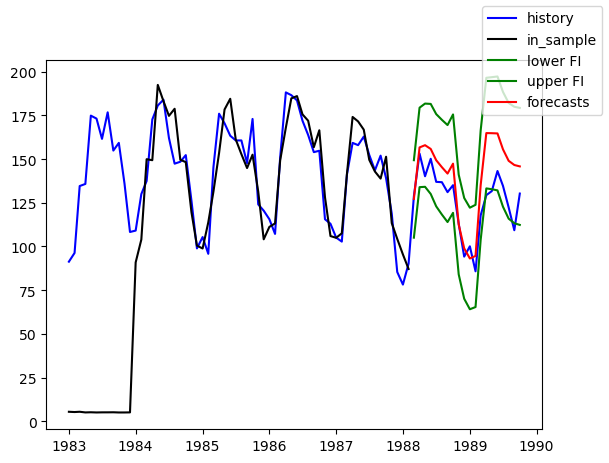

In [30]:
fig, ax = plt.subplots()
ax.plot(all_df["housing"],color='blue',label='history')
ax.plot(all_df["fitted_values"],color='black',label='in_sample')
ax.plot(all_df["LFI"],color='green',label='lower FI')
ax.plot(all_df["UFI"],color='green',label='upper FI')
ax.plot(all_df["Forecasts"],color='red',label='forecasts')
fig.legend()

In [31]:
import numpy as np
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
               # ACF1
    return({'mape':mape, 'mae': mae,  'rmse':rmse})

In [32]:
forecast_accuracy(all_df["Forecasts"],all_df["housing"])

{'mape': 0.1203893307590703,
 'mae': 15.060668348378755,
 'rmse': 18.582672387398283}

In [33]:
sarimax = sm.tsa.statespace.SARIMAX(df[["housing"]],order=auto_model.order,seasonal_order=auto_model.seasonal_order,exog=df[["interest"]],trend='c').fit()
sarimax.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            housing   No. Observations:                   82
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -270.097
Date:                            Mon, 10 Jul 2023   AIC                            556.194
Time:                                    19:42:36   BIC                            574.182
Sample:                                01-01-1983   HQIC                           563.339
                                     - 10-01-1989                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.5231      2.508     -1.405      0.160      -8.438       1.392
interest      -5.7626      4.395     -1.311      0.190     -14.377       2.852
ar.L1          0.2658      0.144      1.848      0.065      -0.016       0.548
ar.L2          0.2665      0.121      2.194      0.028       0.028       0.505
ar.L3          0.1996      0.186      1.072      0.284      -0.165       0.564
ar.S.L12      -0.5226      0.151     -3.466      0.001      -0.818      -0.227
ar.S.L24      -0.3566      0.143     -2.500      0.012      -0.636      -0.077
sigma2       121.3185     24.321      4.988      0.000      73.651     168.986
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.98   Prob(JB):                         0.83
Heteroskedasticity (H):               0.59   Skew:                             0.09
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
future_interest_rates=pd.read_excel(r'C:\Users\ZarasAndreas\Documents\Documents\Courses Taught by Me\Forecasting Course_FINAL\FINAL\Course Presentations\Python\future_interest_rates - Python.xlsx')
pred = sarimax.get_forecast(steps = 26,exog=future_interest_rates[["interest"]])
forecasts=pred.predicted_mean
ci=pred.conf_int()
forecasts_df=pd.DataFrame(forecasts)
ci_df=pd.DataFrame(ci)
predictions_df=pd.concat([forecasts_df,ci_df],axis=1)


In [35]:
df=df.drop(["interest"],axis=1)

In [36]:
all=pd.concat([df,predictions_df])

<AxesSubplot:>

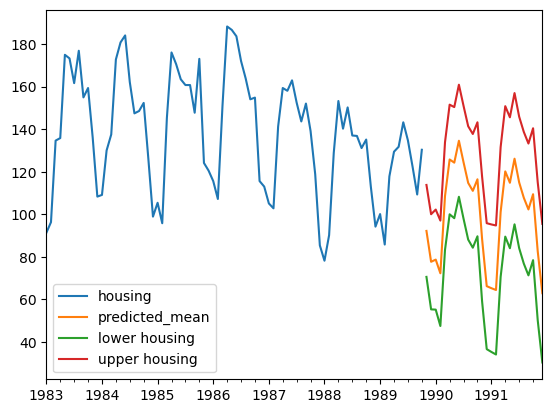

In [37]:
all.plot()